In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

# import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palette
import warnings
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

import tensorflow as tf
import numpy as np
from scipy import stats
# Import the kerastuner library
import keras_tuner as kt

# Ignore all warnings
warnings.filterwarnings("ignore")
import warnings


# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
# read in data # NOTE TO REPLACE THIS WITH SQL

file_path = '../CSV_Output/ML_dataset.csv' # REPLACE WITH FINAL DATABASE

df = pd.read_csv(file_path)

df

,industry,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,...,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema,label
0,Consumer Discretionary,-0.019375,0.042774,-0.009555,-0.007692,6230100.0,6996900.0,6377700.0,7026700.0,30.01,...,14.40,13.74,0.025251,241.428,0.40,5.0,56.240000,8.149406,56.300000,0
1,Utilities,0.025644,0.011924,-0.006826,0.031470,175800.0,195300.0,233900.0,221400.0,17.58,...,11.15,1.49,0.013118,238.132,0.36,5.0,73.803333,87.796610,73.714583,0
2,Real Estate,0.057182,-0.004482,-0.040843,0.036994,1298900.0,3493600.0,571100.0,832500.0,62.13,...,12.97,29.98,0.019104,237.838,0.13,5.0,23.196667,88.260870,23.240833,0
3,Industrials,-0.044857,0.062964,0.055392,-0.058078,1071300.0,880100.0,1080400.0,994800.0,6.68,...,27.43,-18.14,0.023650,305.691,5.08,3.5,235.736667,11.037986,235.240833,0
4,Consumer Staples,0.022806,-0.021995,0.021842,-0.028000,6563300.0,6745100.0,9474700.0,10172500.0,10.28,...,4.55,10.21,0.019597,259.101,0.10,10.2,63.633333,72.448980,63.837083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,Consumer Discretionary,0.011118,0.019845,-0.060006,-0.000558,1252700.0,1125100.0,1055100.0,1414500.0,21.36,...,3.96,3.60,0.017376,243.603,0.66,4.6,34.243333,85.278276,34.327500,1
1910,Health Care,0.000624,0.003380,0.026196,0.020623,1086600.0,1062100.0,959900.0,700900.0,9.51,...,17.24,23.71,0.019483,267.054,0.07,6.1,127.980000,54.818523,128.192500,0
1911,Consumer Discretionary,-0.006360,0.040154,-0.038746,-0.026070,894900.0,935100.0,490500.0,490500.0,9.66,...,3.87,9.40,0.016327,251.712,2.40,4.0,66.236667,56.290439,66.580000,1
1912,Industrials,-0.005385,0.010020,0.101545,-0.066394,4106200.0,3906300.0,12259700.0,12259700.0,5.44,...,12.06,-4.79,0.027206,305.109,5.07,3.6,35.120000,43.270869,35.242500,0


In [3]:
df = df.dropna()
df

,industry,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,...,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema,label
0,Consumer Discretionary,-0.019375,0.042774,-0.009555,-0.007692,6230100.0,6996900.0,6377700.0,7026700.0,30.01,...,14.40,13.74,0.025251,241.428,0.40,5.0,56.240000,8.149406,56.300000,0
1,Utilities,0.025644,0.011924,-0.006826,0.031470,175800.0,195300.0,233900.0,221400.0,17.58,...,11.15,1.49,0.013118,238.132,0.36,5.0,73.803333,87.796610,73.714583,0
2,Real Estate,0.057182,-0.004482,-0.040843,0.036994,1298900.0,3493600.0,571100.0,832500.0,62.13,...,12.97,29.98,0.019104,237.838,0.13,5.0,23.196667,88.260870,23.240833,0
3,Industrials,-0.044857,0.062964,0.055392,-0.058078,1071300.0,880100.0,1080400.0,994800.0,6.68,...,27.43,-18.14,0.023650,305.691,5.08,3.5,235.736667,11.037986,235.240833,0
4,Consumer Staples,0.022806,-0.021995,0.021842,-0.028000,6563300.0,6745100.0,9474700.0,10172500.0,10.28,...,4.55,10.21,0.019597,259.101,0.10,10.2,63.633333,72.448980,63.837083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,Consumer Discretionary,0.011118,0.019845,-0.060006,-0.000558,1252700.0,1125100.0,1055100.0,1414500.0,21.36,...,3.96,3.60,0.017376,243.603,0.66,4.6,34.243333,85.278276,34.327500,1
1910,Health Care,0.000624,0.003380,0.026196,0.020623,1086600.0,1062100.0,959900.0,700900.0,9.51,...,17.24,23.71,0.019483,267.054,0.07,6.1,127.980000,54.818523,128.192500,0
1911,Consumer Discretionary,-0.006360,0.040154,-0.038746,-0.026070,894900.0,935100.0,490500.0,490500.0,9.66,...,3.87,9.40,0.016327,251.712,2.40,4.0,66.236667,56.290439,66.580000,1
1912,Industrials,-0.005385,0.010020,0.101545,-0.066394,4106200.0,3906300.0,12259700.0,12259700.0,5.44,...,12.06,-4.79,0.027206,305.109,5.07,3.6,35.120000,43.270869,35.242500,0


In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["label"]

# Separate the X variable, the features
X = df.drop(columns="label")

In [5]:
X[:2]

,industry,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,...,total_shareholder_return,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema
0,Consumer Discretionary,-0.019375,0.042774,-0.009555,-0.007692,6230100.0,6996900.0,6377700.0,7026700.0,30.01,...,3.80,14.40,13.74,0.025251,241.428,0.40,5.0,56.240000,8.149406,56.300000
1,Utilities,0.025644,0.011924,-0.006826,0.031470,175800.0,195300.0,233900.0,221400.0,17.58,...,2.64,11.15,1.49,0.013118,238.132,0.36,5.0,73.803333,87.796610,73.714583


In [6]:
y[:5]

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [7]:
# One-hot encode the 'industry' column
X = pd.get_dummies(X, columns=['industry'])

X.head()

,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,debt_to_equity,...,industry_Consumer Staples,industry_Energy,industry_Finance,industry_Health Care,industry_Industrials,industry_Miscellaneous,industry_Real Estate,industry_Technology,industry_Telecommunications,industry_Utilities
0,-0.019375,0.042774,-0.009555,-0.007692,6230100.0,6996900.0,6377700.0,7026700.0,30.01,0.63,...,0,0,0,0,0,0,0,0,0,0
1,0.025644,0.011924,-0.006826,0.031470,175800.0,195300.0,233900.0,221400.0,17.58,0.85,...,0,0,0,0,0,0,0,0,0,1
2,0.057182,-0.004482,-0.040843,0.036994,1298900.0,3493600.0,571100.0,832500.0,62.13,0.60,...,0,0,0,0,0,0,1,0,0,0
3,-0.044857,0.062964,0.055392,-0.058078,1071300.0,880100.0,1080400.0,994800.0,6.68,0.36,...,0,0,0,0,1,0,0,0,0,0
4,0.022806,-0.021995,0.021842,-0.028000,6563300.0,6745100.0,9474700.0,10172500.0,10.28,1.35,...,1,0,0,0,0,0,0,0,0,0


In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [9]:
X_train_scaled[:2]

array([[ 8.33612905e-01,  2.12312145e+00, -4.13078856e-01,
         9.29685638e-01, -2.17002890e-01, -1.71148078e-01,
        -1.88545227e-01, -2.06002604e-01, -1.48690641e-01,
         1.01215609e-02,  2.62384174e-01,  4.39926167e-02,
        -6.00914437e-04,  1.05125017e-02,  7.45420568e-01,
        -9.78991435e-01, -4.59478981e-01, -4.96781831e-02,
        -5.51179636e-01,  1.09314695e+00, -5.48297685e-01,
        -1.02778306e-01, -2.64073867e-02, -5.50781791e-01,
        -2.05232921e-01, -2.41370228e-01, -1.67143539e-01,
        -3.84707681e-01, -4.85801858e-01, -3.73587127e-02,
        -1.06186375e-01,  2.14094782e+00, -1.64927697e-01,
        -3.24879971e-01],
       [ 8.67875804e-01,  6.29142114e-01, -1.65863345e+00,
         1.80775445e-02, -2.61163358e-01, -2.56152881e-01,
        -2.57561142e-01, -2.85417268e-01,  8.66008345e-02,
         4.71098733e-02, -3.10332270e-01,  1.58523656e-01,
        -6.49122722e-03,  4.80159518e-02,  1.21407403e-01,
        -1.28210334e+00, -8.15

In [10]:
y_test[:4]

516     1
1882    1
1589    0
1340    1
Name: label, dtype: int64

In [11]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train_scaled shape: (1435, 34)
X_test_scaled shape: (479, 34)
Y_train shape: (1435,)
Y_test shape: (479,)


## Predicting labels with KNN

In [14]:
accuracy_dict = {}

for i in range(1, 31):
    # Instantiate the model with k = 3 neighbors
    model = KNeighborsClassifier(n_neighbors=i)

# Train the model
    model.fit(X_train_scaled, y_train)

# Create predictions
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_dict[i] = accuracy

# Find the key with the highest value
optimal_n_neighbors = max(accuracy_dict, key=lambda k: accuracy_dict[k])

# Print the result
print(f"Optimal n_neighbors is {optimal_n_neighbors} with an accuracy of {accuracy_dict[optimal_n_neighbors]}")


AttributeError: 'NoneType' object has no attribute 'split'

In [13]:
# Instantiate the model with k = 1 neighbors, the optimal value

model = KNeighborsClassifier(n_neighbors=1)

# Train the model
model.fit(X_train_scaled, y_train)

# Create predictions
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

AttributeError: 'NoneType' object has no attribute 'split'

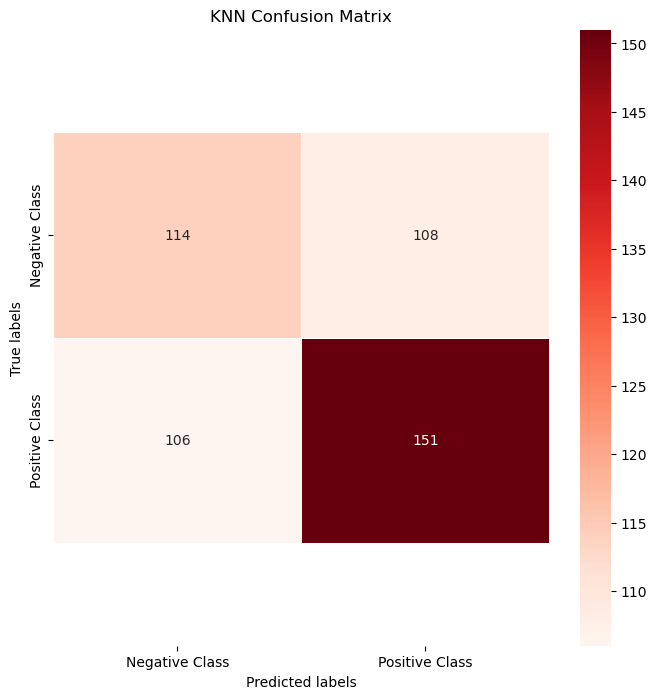

In [43]:
# Confusion matrix for the model
cm = confusion_matrix(y_pred,y_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('KNN Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [45]:
# Display classification report
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.52       220
           1       0.59      0.58      0.59       259

    accuracy                           0.55       479
   macro avg       0.55      0.55      0.55       479
weighted avg       0.55      0.55      0.55       479

